In [4]:
# importing packages
import pandas as pd
import re

from bs4 import BeautifulSoup
from datetime import date, timedelta, datetime
from IPython.core.display import clear_output
from random import randint
from requests import get
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep
from time import time
start_time = time()

from warnings import warn
from googletrans import Translator

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk

In [5]:
# replace variables here.
url = "https://www.linkedin.com/jobs/search/?geoId=90009574&keywords=data%20scientist&location=S%C3%A3o%20Paulo%20e%20Regi%C3%A3o"
no_of_jobs = 1000

In [11]:
# this will open up new window with the url provided above 
driver = webdriver.Chrome()
driver.get(url)
sleep(3)
action = ActionChains(driver)

In [12]:
# to show more jobs. Depends on number of jobs selected
#i = 2
#while i <= (no_of_jobs/25): 
#    driver.find_element_by_xpath('/html/body/main/div/section/button').click()
#    i = i + 1
#    sleep(5)

In [13]:
# parsing the visible webpage
pageSource = driver.page_source
lxml_soup = BeautifulSoup(pageSource, 'lxml')

# searching for all job containers
job_container = lxml_soup.find('ul', class_ = 'jobs-search__results-list')

print('You are scraping information about {} jobs.'.format(len(job_container)))

You are scraping information about 174 jobs.


In [14]:
# setting up list for job information
job_id = []
post_title = []
company_name = []
post_date = []
job_location = []
job_desc = []
level = []
emp_type = []
functions = []
industries = []

# for loop for job title, company, id, location and date posted
for job in job_container:
    
    # job title
    job_titles = job.find("span", class_="screen-reader-text").text
    post_title.append(job_titles)
    
    # linkedin job id
    job_ids = job.find('a', href=True)['href']
    job_ids = re.findall(r'(?!-)([0-9]*)(?=\?)',job_ids)[0]
    job_id.append(job_ids)
    
    # company name
    company_names = job.select_one('img')['alt']
    company_name.append(company_names)
    
    # job location
    job_locations = job.find("span", class_="job-result-card__location").text
    job_location.append(job_locations)
    
    # posting date
    post_dates = job.select_one('time')['datetime']
    post_date.append(post_dates)



In [15]:
# creating a dataframe
job_data = pd.DataFrame({'Job ID': job_id,
'Date': post_date,
'Company Name': company_name,
'Post': post_title,
'Location': job_location
})

In [16]:
L = ['(?i)dados','(?i)BI','(?i)B.I.','(?i)analytics','(?i)data']
pat = '|'.join(r"\b{}\b".format(x) for x in L)
job_data['chave'] = job_data['Post'].str.findall(pat).str.join('/')
cond = job_data['chave'] != ''
job_data_filter = job_data[cond]
job_data_filter

,Job ID,Date,Company Name,Post,Location,chave
0,2271240147,2020-11-03,Qintess,Cientista de dados,São Paulo e Região,dados
1,2198777684,2020-10-22,Santander Brasil,Data Scientist,"São Paulo, SP",Data
2,2197001674,2020-10-20,Philips,Data Scientist,"Barueri, SP",Data
3,2258428165,2020-10-05,Dasa,Data Scientist,"São Paulo, SP",Data
4,2222349353,2020-09-26,UGO Networks,Data Scientist,"São Paulo, PE",Data
...,...,...,...,...,...,...
166,2241016973,2020-10-22,Osbr - Optimus Serviços Do Brasil,Engenheiro De Dados/ Data Engineer,"São Paulo, São Paulo, Brasil",Dados/Data
167,2255593175,2020-10-21,DIGITAL INC TECNOLOGIA E MARKETING LTDA.,DATA ENGINEER / DESENVOLVEDOR(A) WEB,"São Paulo, São Paulo, Brasil",DATA
168,2257711809,2020-10-08,Sciensa,Senior Data Engineer,"São Paulo, São Paulo, Brasil",Data
169,2257715389,2020-10-08,Sciensa,Pleno Data Engineer,"São Paulo, São Paulo, Brasil",Data


In [43]:
# for loop for job description and criterias
for x in range(1,len(job_id)+1):
    
    # clicking on different job containers to view information about the job
    job_xpath = '/html/body/main/div/section/ul/li[{}]/img'.format(x)
    elm = driver.find_element_by_xpath(job_xpath)
    elm.click()
    sleep(1)
    
    # open whole description
    all_xpath = '/html/body/main/section/div[2]/section[2]/div/section/button[1]'
    driver.find_element_by_xpath(all_xpath).click()
    sleep(1)
    
    # job description
    jobdesc_xpath = '/html/body/main/section/div[2]/section[2]/div'
    job_descs = driver.find_element_by_xpath(jobdesc_xpath).text
    job_desc.append(job_descs)
    
    # job criteria container below the description
    job_criteria_container = lxml_soup.find('ul', class_ = 'job-criteria__list')
    all_job_criterias = job_criteria_container.find_all("span", class_='job-criteria__text job-criteria__text--criteria')
    
    ## Seniority level
    #seniority_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[1]'
    #seniority = driver.find_element_by_xpath(seniority_xpath).text.splitlines(0)[1]
    #level.append(seniority)
    #
    ## Employment type
    #type_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[2]'
    #employment_type = driver.find_element_by_xpath(type_xpath).text.splitlines(0)[1]
    #emp_type.append(employment_type)
    #
    ## Job function
    #function_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[3]'
    #job_function = driver.find_element_by_xpath(function_xpath).text.splitlines(0)[1]
    #functions.append(job_function)
    
    # Industries
    #industry_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[4]'
    #industry_type = driver.find_element_by_xpath(industry_xpath).text.splitlines(0)[1]
    #industries.append(industry_type)
    
    x = x+1

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=86.0.4240.111)


In [44]:
# to check if we have all information
print(len(job_id))
print(len(post_date))
print(len(company_name))
print(len(post_title))
print(len(job_location))
print(len(job_desc))
print(len(level))
print(len(emp_type))
print(len(functions))
print(len(industries))

174
174
174
174
174
108
0
0
0
0


In [46]:
# creating a dataframe
job_data = pd.DataFrame({'Job ID': job_id[:108],
'Date': post_date[:108],
'Company Name': company_name[:108],
'Post': post_title[:108],
'Location': job_location[:108],
'Description': job_desc#,
#'Level': level,
#'Type': emp_type,
#'Function': functions,
#'Industry': industries
})

# cleaning description column
job_data['Description'] = job_data['Description'].str.replace('\n',' ')

print(job_data.info())
job_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job ID        108 non-null    object
 1   Date          108 non-null    object
 2   Company Name  108 non-null    object
 3   Post          108 non-null    object
 4   Location      108 non-null    object
 5   Description   108 non-null    object
dtypes: object(6)
memory usage: 5.2+ KB
None


,Job ID,Date,Company Name,Post,Location,Description
0,2271240147,2020-11-03,Qintess,Cientista de dados,São Paulo e Região,Enviar mensagem direta ao anunciante da vaga n...
1,2198777684,2020-10-22,Santander Brasil,Data Scientist,"São Paulo, SP","Somos do Santander, um time focado em identifi..."
2,2197001674,2020-10-20,Philips,Data Scientist,"Barueri, SP",Job Description Philips is leading the technol...
3,2258428165,2020-10-05,Dasa,Data Scientist,"São Paulo, SP",Job Description With innovation and entrepren...
4,2222349353,2020-09-26,UGO Networks,Data Scientist,"São Paulo, PE",Venha trabalhar na Hands (Data Driven Mobile E...


In [48]:
# Traduzir

translator = Translator()

# titulo

translations = translator.translate(job_data['Post'].to_list())

titulo_en = []

for i in translations:
    titulo_en.append(i.text)

titulo_en

job_data['titulo_en'] = titulo_en

# descricao

translations = translator.translate(job_data['Description'].to_list())

descr_en = []

for i in translations:
    descr_en.append(i.text)

descr_en

job_data['descr_en'] = descr_en
    
job_data.head()

,Job ID,Date,Company Name,Post,Location,Description,titulo_en,descr_en
0,2271240147,2020-11-03,Qintess,Cientista de dados,São Paulo e Região,Enviar mensagem direta ao anunciante da vaga n...,Data scientist,Send a direct message to the Qintess advertise...
1,2198777684,2020-10-22,Santander Brasil,Data Scientist,"São Paulo, SP","Somos do Santander, um time focado em identifi...",Data Scientist,"We are from Santander, a team focused on ident..."
2,2197001674,2020-10-20,Philips,Data Scientist,"Barueri, SP",Job Description Philips is leading the technol...,Data Scientist,Job Description Philips is leading the technol...
3,2258428165,2020-10-05,Dasa,Data Scientist,"São Paulo, SP",Job Description With innovation and entrepren...,Data Scientist,Job Description With innovation and entrepren...
4,2222349353,2020-09-26,UGO Networks,Data Scientist,"São Paulo, PE",Venha trabalhar na Hands (Data Driven Mobile E...,Data Scientist,Come work at Hands (Data Driven Mobile Experie...


In [49]:
pd.set_option('display.max_colwidth', -1)
job_data[:1]

<ipython-input-49-32a3e311e4b0>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Job ID,Date,Company Name,Post,Location,Description,titulo_en,descr_en
0,2271240147,2020-11-03,Qintess,Cientista de dados,São Paulo e Região,Enviar mensagem direta ao anunciante da vaga na Qintess Adriana Pollezi Talent Acquisition | Headhunter | IT Recruiter | Tech Recruiter | Recrutamento e Seleção de TI,Data scientist,Send a direct message to the Qintess advertiser Adriana Pollezi Talent Acquisition | Headhunter | IT Recruiter | Tech Recruiter | IT Recruitment and Selection


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


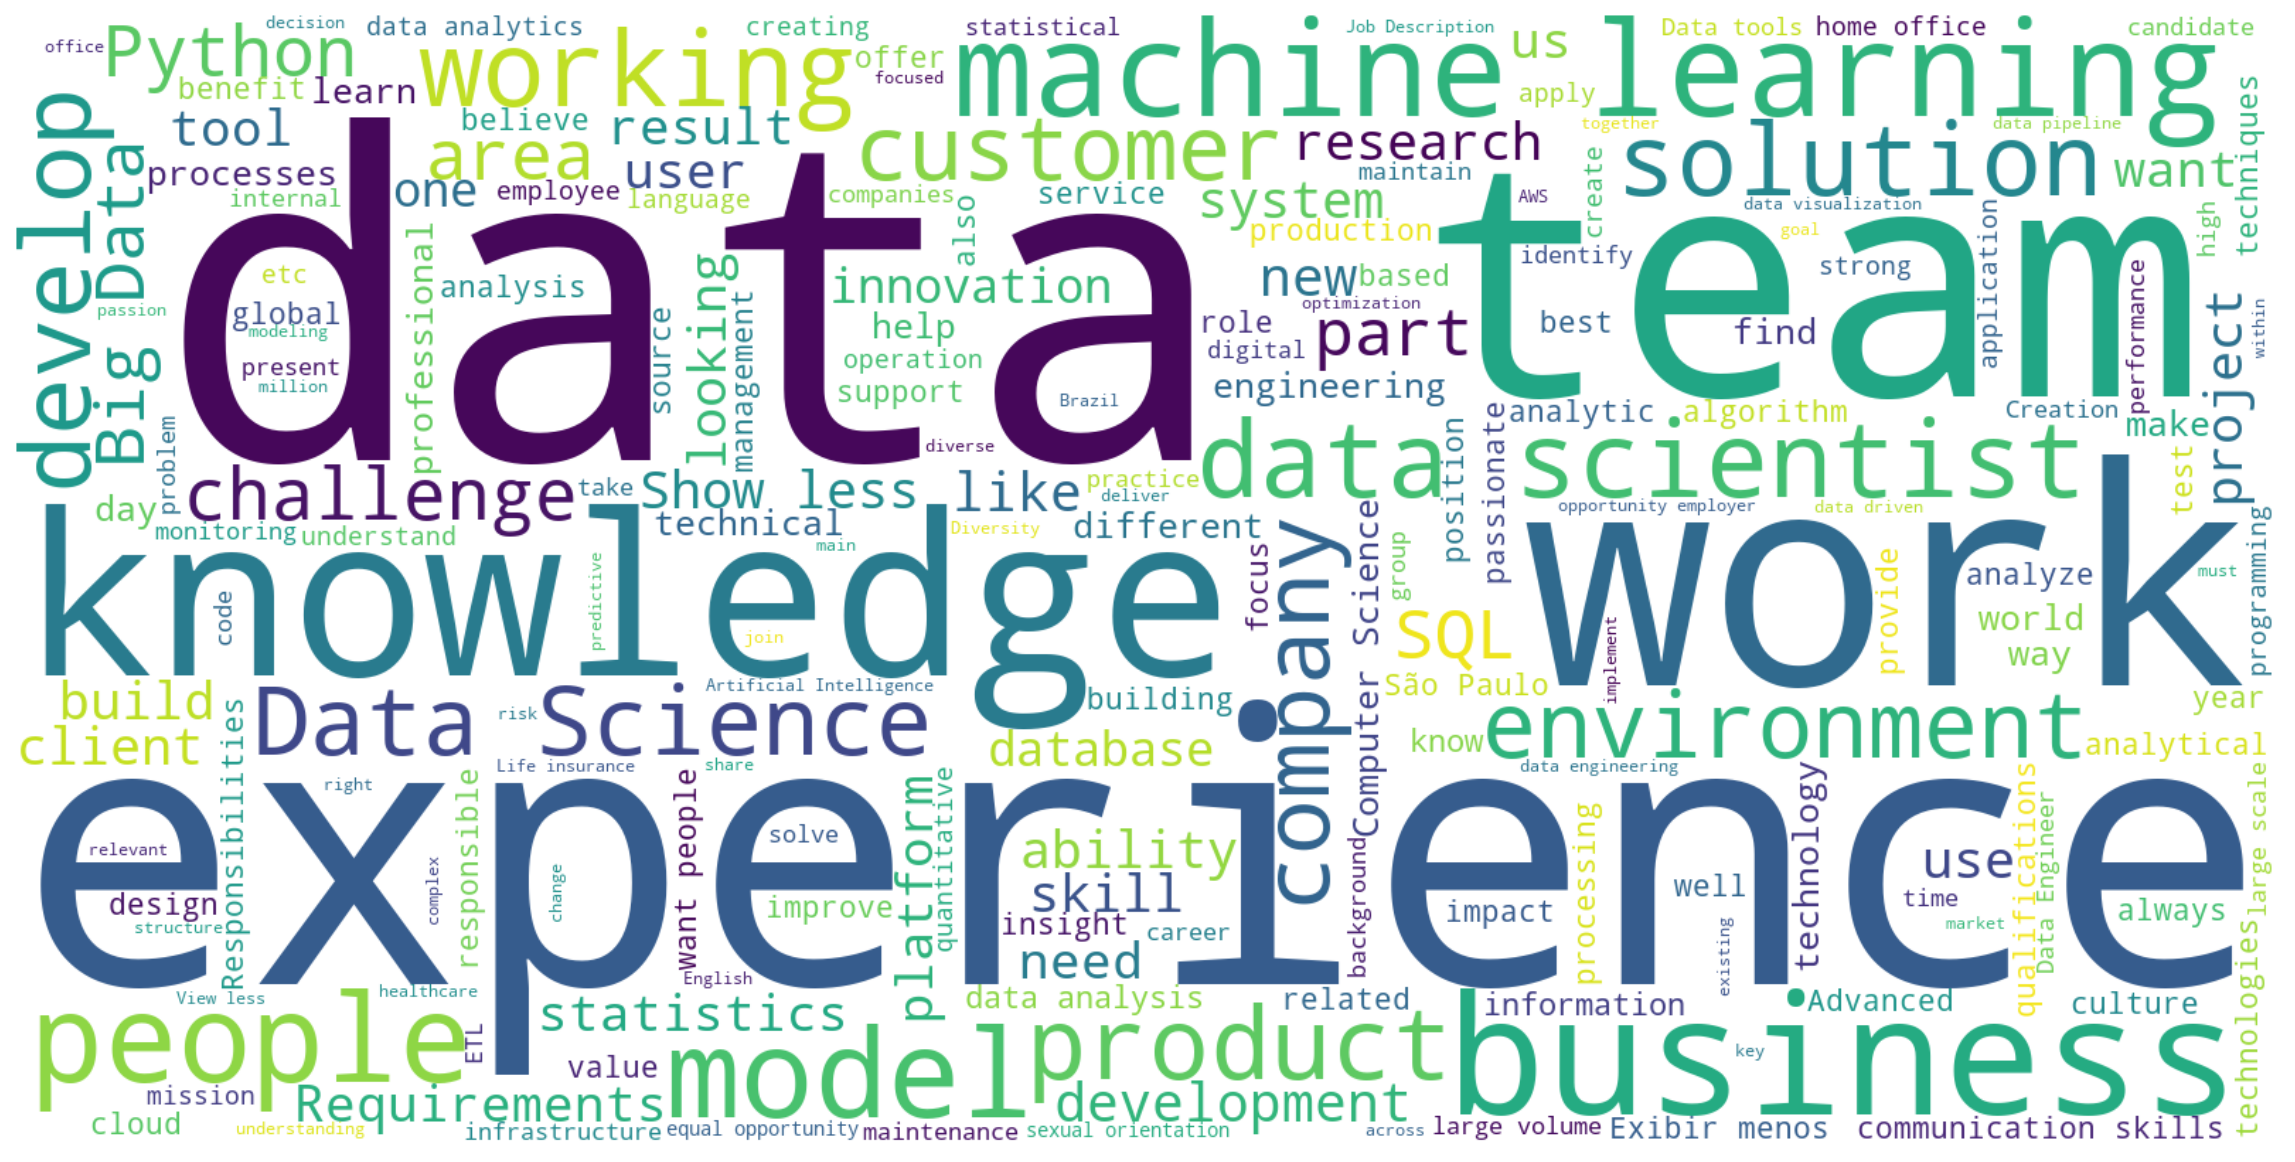

In [50]:
# Stopwords:
nltk.download('stopwords')
mpl.rcParams['figure.dpi'] = 150

text = job_data['descr_en'].str.cat(sep=', ')

stopwords = nltk.corpus.stopwords.words('english')

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()